In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Read in the data
df = pd.read_csv('results/Relations_Important_all.csv', sep=',')
df.set_index('node_idx', inplace=True)
df['tot'] = df.sum(axis=1)
gb = df.groupby('label')    
#gb.get_group(0)
df

,label,abstract,address,author,booktitle,carriedOutBy,carriesOut,chapter,dealtWithIn,edition,...,worksAtProject,year,WBS,1999,2000,2000.1,2002,2002.1,2002.2,tot
node_idx,,,,,,,,,,,,,,,,,,,,,
5678,0,NaN,NaN,16.0,NaN,2.0,NaN,NaN,6.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0
5724,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0
5699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0
5688,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0
5702,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0
5714,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0
5708,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0
5843,0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,26.0
5873,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0


In [67]:
#Get the relative importance of each relation for each class (divided by the total importance score of the class)


for i in np.unique(df['label']):
    exec(f'group_{i} = gb.get_group(i)')
    exec(f'group_rel_{i} = group_{i}.iloc[:,1:].div(group_{i}.tot, axis=0)')
    exec(f'group_rel_{i} = group_rel_{i}.drop(columns=["tot"])')
    exec(f'group_max_{i} = group_rel_{i}.idxmax(axis=1)')

#group_rel_0
print('group_max_0: \n', group_max_0.value_counts(),
      '\n group_max_1 \n', group_max_1.value_counts(),
        '\n group_max_2 \n', group_max_2.value_counts(),
        '\n group_max_3 \n', group_max_3.value_counts())


group_max_0: 
 fax             7
author          6
isWorkedOnBy    1
dtype: int64 
 group_max_1 
 author     3
isAbout    1
dtype: int64 
 group_max_2 
 author          9
isWorkedOnBy    1
member          1
dtype: int64 
 group_max_3 
 author         4
dealtWithIn    1
fax            1
dtype: int64


In [86]:
df_rel = df.iloc[:,1:].div(df.tot, axis=0)
df_rel['label'] = df['label']


In [61]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['author'].count(), mean=X['author'].mean(), std=X['author'].std())
# output

,label,n,mean,std
0,0,7,0.250178,0.109556
1,1,4,0.191162,0.070490
2,2,11,0.402393,0.237986
3,3,4,0.253130,0.068960


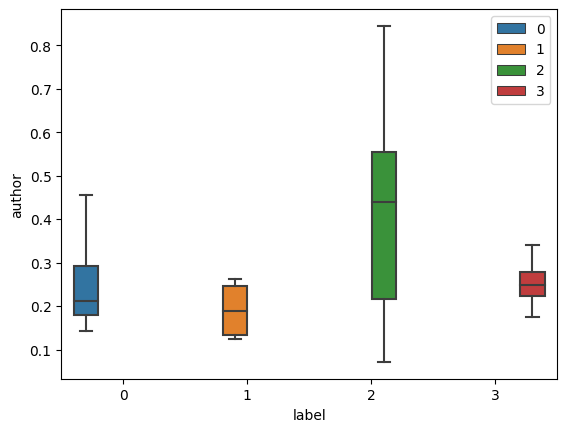

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_rel, x="label", y="author",  hue=df.label.tolist())
#sns.boxplot(data=df_rel, x="plant_var", y="canopy_vol", hue=df.plant_var..tolist(), ax=axs[1])
plt.show()

In [82]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('author + fax ~ label', data=df)
print(fit.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 2.0000 23.0000 -7398770816394397.0000 1.0000
         Pillai's trace                1.0000 2.0000 23.0000 -7398770816394398.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
    Roy's greatest root -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

In [85]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(group_rel_0['author'], group_rel_1['author'])
print(fvalue, pvalue)

nan nan
